# Data Analyst Job Market Analysis

## Motivation
As a 3D artist with an informatics background, I analyze 
the data analyst job market to evaluate a possible career switch 
from 3D artist to data analyst.

## Part 1: USA Market Deep Dive
#### 1.1 Dataset Overview
#### 1.2 Data Cleaning 
##### 1.2.1 Salary Estimate in Min, Max and Middle Salary
#### 1.3 Salary Analysis
#### 1.4 Skills Requirements
#### 1.5 Geographic Distribution
#### 1.6 Industry Breakdown

## Part 2: Germany Market Insights
#### 2.1 Data Collection Methodology
"Daten manuell erhoben via StepStone, Indeed (Januar 2026)"
#### 2.2 Salary Comparison (USA vs Germany)
#### 2.3 Job Availability

## Part 3: Career Switch Analysis
#### 3.1 3D Artist vs Data Analyst (Germany)
#### 3.2 Transferable Skills
#### 3.3 Conclusions & Next Steps
#### _______________________________________________________________________________________________________

## Part 1: USA Market Deep Dive
### 1.1 Dataset Overview

In [3]:
import pandas as pd
import numpy as np

# 1. USA-Daten (dein Kaggle Dataset)
df_usa = pd.read_csv('data/DataAnalyst.csv',delimiter=',')

df_usa.head(1)



,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,True


### 1.2 Data Cleaning 
#### 1.2.1 Salary Estimate in Min, Max and Middle Salary

In [39]:
df_usa_cleaned = df_usa.copy()

df_usa_cleaned['Salary Estimate']

#----------------- Clear Slary Estimate -----------------------------------------------------------------------------

# for sep in ["K", "$", ","]:
#     df_usa_cleaned['Salary Estimate'] = df_usa_cleaned['Salary Estimate'].replace(sep, " ")
# Cleara the Sybmols 'K', '$' and '-'
df_usa_cleaned['Salary Estimate'] = df_usa_cleaned['Salary Estimate'].str.replace('K', ' ')
df_usa_cleaned['Salary Estimate'] = df_usa_cleaned['Salary Estimate'].str.replace('$', ' ')
df_usa_cleaned['Salary Estimate'] = df_usa_cleaned['Salary Estimate'].str.replace('-', '')

# Split the Min Salary Estimate and Max Salary Estimate 
df_usa_cleaned['Min Salary Estimate'] = df_usa_cleaned['Salary Estimate'].str.split(' ').str[1]
df_usa_cleaned['Max Salary Estimate'] = df_usa_cleaned['Salary Estimate'].str.split(' ').str[3]


# The Null Values from the Min Salary Estimate and Max Salary Estimate, 
# will be settet to the middle Values of the collum
Min_Salary_middle_Value = df_usa_cleaned['Min Salary Estimate'].mode()[0]
df_usa_cleaned.loc[df_usa_cleaned['Min Salary Estimate'].isnull(), 'Min Salary Estimate' ] = Min_Salary_middle_Value

Min_Salary_middle_Value = df_usa_cleaned['Max Salary Estimate'].mode()[0]
df_usa_cleaned.loc[df_usa_cleaned['Max Salary Estimate'].isnull(), 'Max Salary Estimate' ] = Min_Salary_middle_Value

# #df_usa_cleaned.loc[[2149]]
df_usa_cleaned.drop('Salary Estimate', axis=1, inplace=True)
# df_usa_cleaned.drop(df_usa_cleaned[df_usa_cleaned['Min Salary Estimate'].isnull()], axis=1, inplace=True)  

# Set the type of the collums to int
# Multyply by 1000 becose of the K in the original Salary Estimate
df_usa_cleaned['Min Salary Estimate'] = df_usa_cleaned['Min Salary Estimate'].astype(int) * 1000
df_usa_cleaned['Max Salary Estimate'] = df_usa_cleaned['Max Salary Estimate'].astype(int) * 1000


#----------------- Clear Location -----------------------------------------------------------------------------

# Stadt extrahieren (vor dem Komma)
df_usa_cleaned['City'] = df_usa_cleaned['Location'].str.split(',').str[0].str.strip()

# State extrahieren (nach dem Komma)
df_usa_cleaned['State'] = df_usa_cleaned['Location'].str.split(',').str[1].str.strip()

# Converrt to String
# df_usa_cleaned['City'] = df_usa_cleaned['City'].astype('string')
# df_usa_cleaned['State'] = df_usa_cleaned['State'].astype('string')

# Delewte the Location Collum
df_usa_cleaned.drop('Location', axis=1, inplace=True)
df_usa_cleaned.info()

# Prüfen
# print("\nBeispiele:")
# print(df_usa_cleaned[['Location', 'City', 'State']].head(10))


# df_usa_cleaned.info()
df_usa_cleaned.head(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2253 entries, 0 to 2252
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           2253 non-null   int64  
 1   Job Title            2253 non-null   object 
 2   Job Description      2253 non-null   object 
 3   Rating               2253 non-null   float64
 4   Company Name         2252 non-null   object 
 5   Headquarters         2253 non-null   object 
 6   Size                 2253 non-null   object 
 7   Founded              2253 non-null   int64  
 8   Type of ownership    2253 non-null   object 
 9   Industry             2253 non-null   object 
 10  Sector               2253 non-null   object 
 11  Revenue              2253 non-null   object 
 12  Competitors          2253 non-null   object 
 13  Easy Apply           2253 non-null   object 
 14  Min Salary Estimate  2253 non-null   int64  
 15  Max Salary Estimate  2253 non-null   i

,Unnamed: 0,Job Title,Job Description,Rating,Company Name,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,Min Salary Estimate,Max Salary Estimate,City,State
0,0,"Data Analyst, Center on Immigration and Justic...",Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,True,37000,66000,New York,NY


#### 1.3 Salary Analysis

In [ ]:
# Gehälter:
# Top 10 bestbezahlte Städte

# Durchschnittsgehalt pro Stadt berechnen
# **Beispiel:**
# groupby() :
# Vorher (einzelne Zeilen):              # Nachher (gruppiert):
# Job 1: New York, $70,000               # New York: [$70,000, $80,000, $90,000]
# Job 4: Boston, $75,000                 # Boston: [$65,000, $75,000]
# Job 5: New York, $90,000

# agg() :                                      
# - Nimm die Spalte `'Max Salary Estimate'`   # New York: [$70,000, $80,000, $90,000]               # Boston: [$65,000, $75,000]
# - Berechne **zwei Sachen**:                 #   → mean = (70000 + 80000 + 90000) / 3 = $80,000    #   → mean = (65000 + 75000) / 2 = $70,000
#   - `'mean'` = Durchschnitt                 #   → count = 3 Jobs                                  #   → count = 2 Jobs
#   - `'count'` = Wie viele Jobs

city_salary = df_usa_cleaned.groupby('City').agg({
    'Max Salary Estimate': ['mean', 'count']
}).round(0)

# Nur Städte mit mindestens 5 Jobs berücksichtigen
# Rename Columns
city_salary.columns = ['Avg_Salary', 'Job_Count']
# Add the cities with min 5 Jobs
city_salary = city_salary[city_salary['Job_Count'] >= 5]
#Sort the highter Salary first  
city_salary = city_salary.sort_values('Avg_Salary', ascending=False)

# Save the first 10 Citys with top salarys
top_10_cities = city_salary.head(10)

# Print TOP 10
print("\n" + "="*80)
print("TOP 10 BESTBEZAHLTE STÄDTE (min. 5 Jobs):")
print("="*80)
print(top_10_cities)




TOP 10 BESTBEZAHLTE STÄDTE (min. 5 Jobs):
               Avg_Salary  Job_Count
City                                
San Jose         138289.0         38
Cupertino        134000.0         13
Santa Clara      133091.0         22
Sunnyvale        130562.0         16
Menlo Park       129455.0         11
San Francisco    126025.0        119
Fremont          123800.0          5
Redwood City     123500.0         12
Palo Alto        120000.0         14
San Diego        118048.0         62


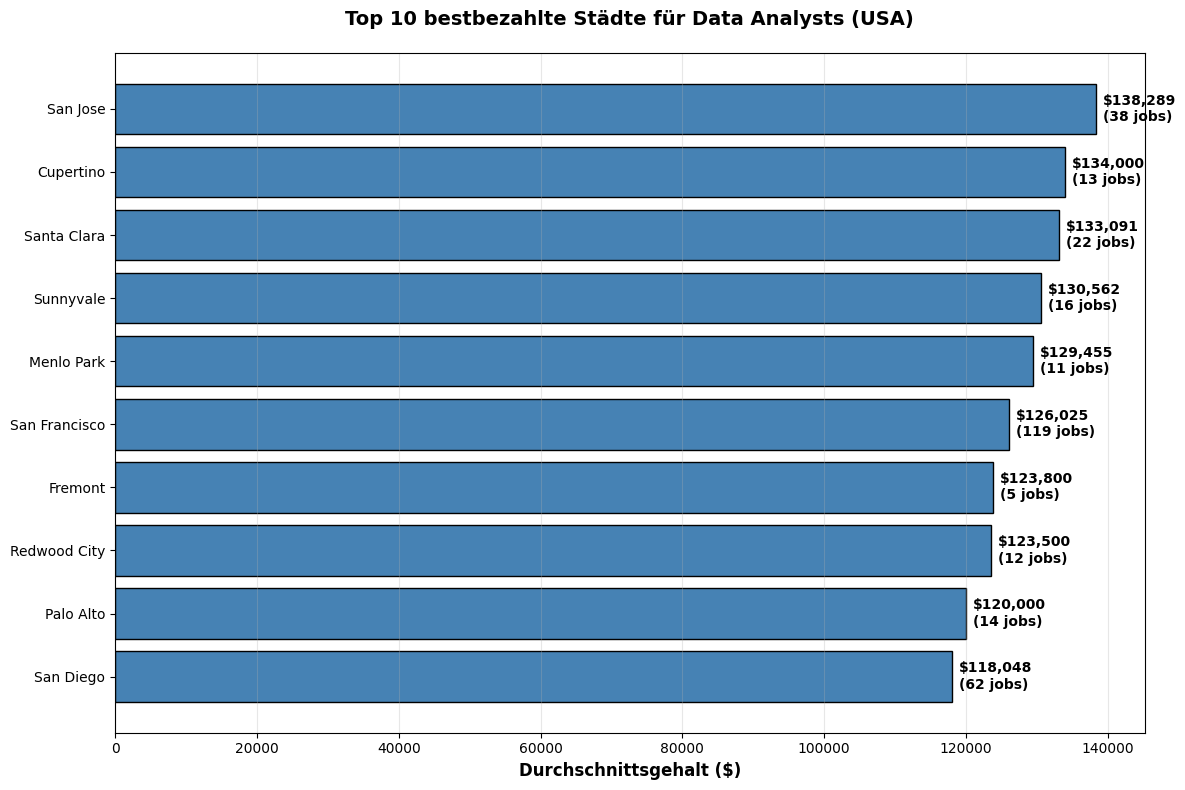


✅ Grafik gespeichert als 'top_10_cities_salary.png'


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Erstelle Balkendiagramm
plt.figure(figsize=(12, 8))

# Daten vorbereiten
cities = top_10_cities.index.tolist()
salaries = top_10_cities['Avg_Salary'].values
job_counts = top_10_cities['Job_Count'].values

# Balkendiagramm
bars = plt.barh(cities, salaries, color='steelblue', edgecolor='black')

# Jobnummer als Text hinzufügen
for i, (bar, count, salary) in enumerate(zip(bars, job_counts, salaries)):
    plt.text(salary + 1000, i, f'${salary:,.0f}\n({int(count)} jobs)', 
             va='center', fontsize=10, fontweight='bold')

plt.xlabel('Durchschnittsgehalt ($)', fontsize=12, fontweight='bold')
plt.title('Top 10 bestbezahlte Städte für Data Analysts (USA)', 
          fontsize=14, fontweight='bold', pad=20)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.gca().invert_yaxis()  # Höchste oben

plt.savefig('top_10_cities_salary.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✅ Grafik gespeichert als 'top_10_cities_salary.png'")

In [27]:
# 2. Deutschland - Manuelle Daten (ergänzend)
germany_data = {
    'Country': ['Germany'] * 4,
    'City': ['Düsseldorf'] * 4,
    'Job_Title': ['Data Analyst', 'Data Analyst', '3D Artist', '3D Artist'],
    'Level': ['Entry', 'Senior', 'Entry', 'Senior'],
    'Avg_Salary_EUR': [50100, 80000, 36400, 50000],
    'Job_Count_Duesseldorf': [497, np.nan, 4, np.nan],
    'Source': ['StepStone 2026'] * 4
}

df_germany = pd.DataFrame(germany_data)

# 3. Währungsumrechnung für Vergleich
exchange_rate = 0.92  # USD to EUR (aktuell anpassen)

df_germany



,Country,City,Job_Title,Level,Avg_Salary_EUR,Job_Count_Duesseldorf,Source
0,Germany,Düsseldorf,Data Analyst,Entry,50100,497.0,StepStone 2026
1,Germany,Düsseldorf,Data Analyst,Senior,80000,NaN,StepStone 2026
2,Germany,Düsseldorf,3D Artist,Entry,36400,4.0,StepStone 2026
3,Germany,Düsseldorf,3D Artist,Senior,50000,NaN,StepStone 2026
